# **Spit some [tensor] flow**

We need to learn the intricacies of tensorflow to master deep learning

`Let's get this over with`



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
print(tf.__version__)

Using TensorFlow backend.


2.2.0


In [0]:
from tensorflow.keras.layers import Input, Dropout, Dense, Flatten, SimpleRNN, LSTM, GlobalMaxPooling1D, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, Adamax
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Let's import the dataset


In [0]:
def evaluation_tf(report, y_test, y_pred, classes):
  plt.plot(report.history['loss'], label = 'training_loss')
  plt.plot(report.history['val_loss'], label = 'validation_loss')
  plt.legend()
  plt.show()
  plt.plot(report.history['accuracy'], label = 'training_accuracy')
  plt.plot(report.history['val_accuracy'], label = 'validation_accuracy')
  plt.legend()
  plt.show()


In [0]:
from keras.datasets import imdb
(X_train, y_train), (X_test, y_test) = imdb.load_data(path="imdb.npz",
                                                     num_words=None,
                                                     skip_top=0,
                                                     maxlen=None)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [7]:
print(X_train[np.random.randint(0,len(X_train))])

[1, 12039, 4, 12632, 127, 6, 117, 67102, 5, 6, 20, 91, 3939]


In [8]:
print(set(y_train))

{0, 1}


In [9]:
V = 5000
tokenizer = Tokenizer(num_words=V)
X_train = tokenizer.sequences_to_matrix(X_train, mode='binary')
X_test = tokenizer.sequences_to_matrix(X_test, mode='binary')
print(X_train[np.random.randint(0,len(X_train))])

[0. 1. 0. ... 0. 0. 0.]


In [10]:
print(X_train.shape)
print(X_test.shape)

(25000, 5000)
(25000, 5000)


In [11]:
classes = len(set(y_train))
y_train = keras.utils.to_categorical(y_train, classes)
y_test = keras.utils.to_categorical(y_test, classes)
print(y_train.shape)
print(y_test.shape)

(25000, 2)
(25000, 2)


In [12]:
print("tokens = " + str(V))

tokens = 5000


In [0]:
i_layer = Input(shape = (V,))
h_layer = Dense(254, activation='relu')(i_layer)
h_layer = Dropout(0.9)(h_layer)
o_layer = Dense(classes, activation='softmax')(h_layer)

model = Model(i_layer, o_layer)

In [0]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [15]:
report = model.fit(X_train, y_train, epochs = 30, validation_data=(X_test, y_test))

Epoch 1/30
782/782 [==============================] - 4s 5ms/step - loss: 0.4561 - accuracy: 0.7888 - val_loss: 0.2987 - val_accuracy: 0.8826
Epoch 2/30
782/782 [==============================] - 4s 5ms/step - loss: 0.3315 - accuracy: 0.8616 - val_loss: 0.2779 - val_accuracy: 0.8868
Epoch 3/30
782/782 [==============================] - 4s 5ms/step - loss: 0.3044 - accuracy: 0.8749 - val_loss: 0.2731 - val_accuracy: 0.8874
Epoch 4/30
782/782 [==============================] - 4s 5ms/step - loss: 0.2810 - accuracy: 0.8886 - val_loss: 0.2773 - val_accuracy: 0.8846
Epoch 5/30
782/782 [==============================] - 4s 5ms/step - loss: 0.2739 - accuracy: 0.8912 - val_loss: 0.2741 - val_accuracy: 0.8874
Epoch 6/30
782/782 [==============================] - 4s 5ms/step - loss: 0.2595 - accuracy: 0.8983 - val_loss: 0.2812 - val_accuracy: 0.8854
Epoch 7/30
782/782 [==============================] - 4s 5ms/step - loss: 0.2516 - accuracy: 0.9006 - val_loss: 0.2863 - val_accuracy: 0.8844
Epoch 

In [0]:
y_pred = model.predict(X_test)

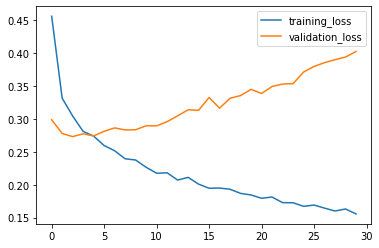

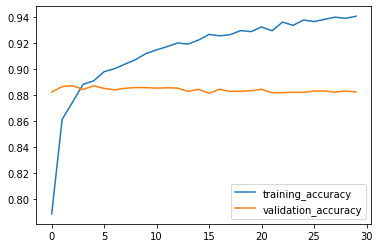

In [17]:
evaluation_tf(report, y_test, y_pred, classes)